<a href="https://colab.research.google.com/github/KawulJanSetouchi/KawulJanSetouchi/blob/main/Colaboratory_Neon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.29411188, -0.9642541 , -0.42384276, -0.2826403 ,  0.02510581,
        -0.28817928,  0.37656543, -0.00561207,  0.02197005, -0.11515022]],
      dtype=float32)

In [8]:
tf.nn.softmax(predictions).numpy()

array([[0.14473458, 0.04112169, 0.07059412, 0.08130027, 0.11059728,
        0.0808512 , 0.15717426, 0.10725162, 0.11025102, 0.09612405]],
      dtype=float32)

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
loss_fn(y_train[:1], predictions).numpy()

2.5151448

In [11]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2901 - accuracy: 0.9158
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1409 - accuracy: 0.9587
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1056 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0862 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0741 - accuracy: 0.9769


In [13]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0681 - accuracy: 0.9790 - 618ms/epoch - 2ms/step


[0.06806729733943939, 0.9789999723434448]

In [14]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [15]:
probability_model(x_test[:5])


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.02227213e-08, 9.03349076e-08, 1.67450344e-05, 1.15659635e-03,
        1.80484837e-12, 2.93736116e-06, 3.18700742e-15, 9.98820007e-01,
        3.50907590e-06, 1.17140210e-07],
       [2.12314959e-07, 4.24051432e-05, 9.99939203e-01, 1.71477932e-05,
        7.00252090e-15, 1.16239733e-07, 9.89564839e-08, 8.35392866e-12,
        7.04999763e-07, 7.12396234e-13],
       [3.48127310e-06, 9.99518394e-01, 4.96189532e-05, 1.28802885e-05,
        4.00550562e-05, 3.22974779e-06, 3.52159586e-05, 2.73000827e-04,
        6.31938237e-05, 1.06994537e-06],
       [9.99525905e-01, 2.44310776e-08, 3.47748544e-04, 3.12704560e-06,
        1.07806898e-07, 4.19103935e-06, 9.10474482e-05, 2.77925920e-07,
        3.25255400e-07, 2.72553225e-05],
       [1.32858495e-05, 2.37199586e-07, 1.00804209e-06, 1.36155393e-07,
        9.96871293e-01, 5.63519416e-06, 6.35002198e-06, 2.74066388e-05,
        2.18105765e-06, 3.07245133e-03]], dtype=float32)>

## **Tensorflow study start.....**







In [16]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


In [17]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [23]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [26]:
train_images.shape

(60000, 28, 28)

In [27]:
len(train_labels)

60000

In [28]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
test_images.shape

(10000, 28, 28)

In [33]:
len(test_labels)

10000

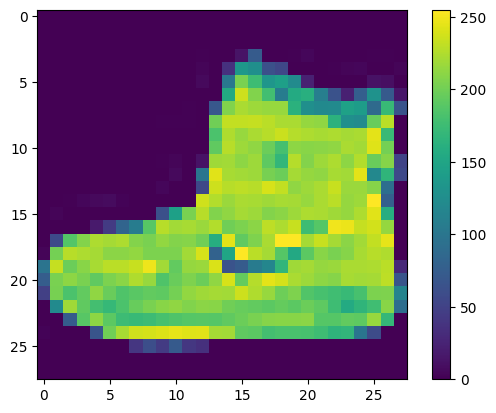

In [34]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [35]:
train_images = train_images / 255.0

test_images = test_images / 255.0

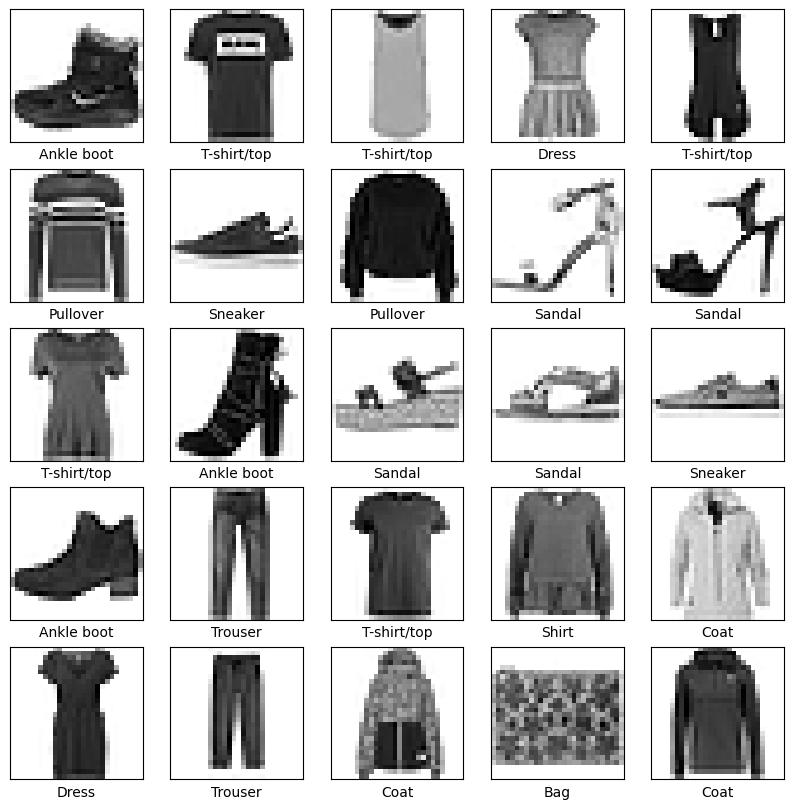

In [36]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4977 - accuracy: 0.8264
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3753 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3371 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3150 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2944 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2821 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2681 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2560 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2481 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.24

In [41]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.3364 - accuracy: 0.8853 - 2s/epoch - 6ms/step

Test accuracy: 0.8852999806404114


## **Predict**

In [42]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [43]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [44]:
predictions[0]

array([8.2771749e-08, 1.4074993e-09, 3.9456477e-08, 1.2323442e-09,
       7.6609012e-09, 8.7201741e-04, 5.0523195e-08, 1.2515309e-02,
       1.9085293e-08, 9.8661256e-01], dtype=float32)

In [45]:
np.argmax(predictions[0])

9

In [46]:
test_labels[0]

9

In [47]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

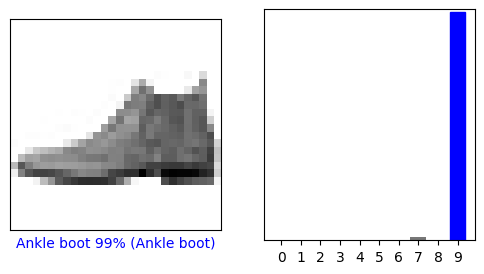

In [48]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

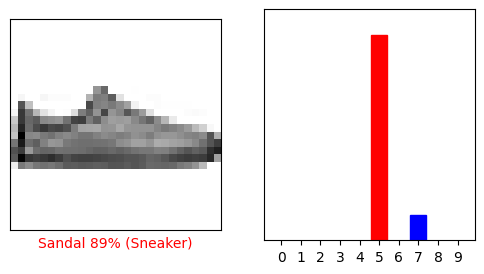

In [49]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

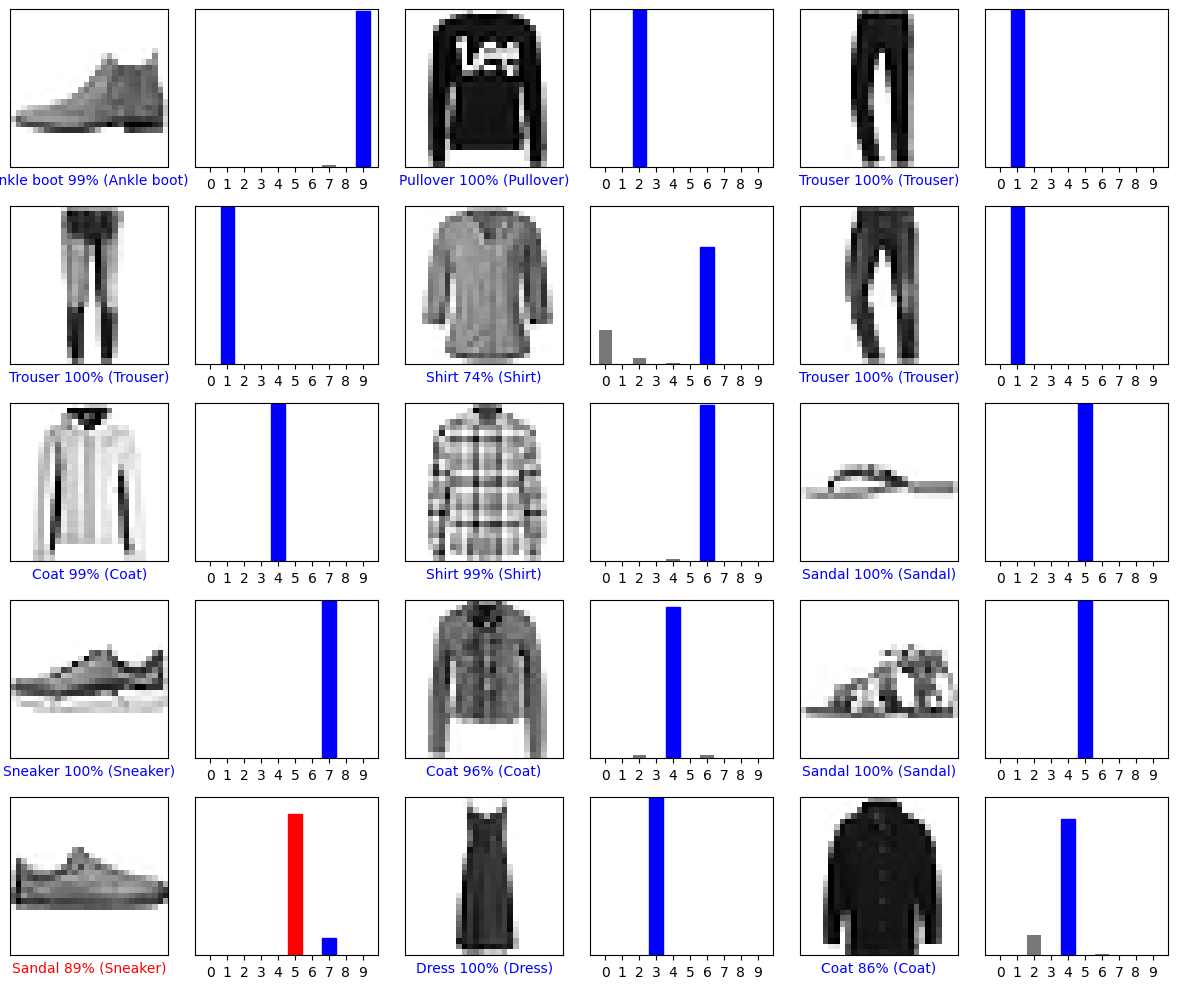

In [50]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [51]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [52]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [53]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 38ms/step
[[1.2128509e-04 8.4095979e-14 9.9662751e-01 3.6208135e-08 2.5598926e-03
  1.5876802e-12 6.9132599e-04 5.4148269e-17 5.7144168e-11 3.7258394e-11]]


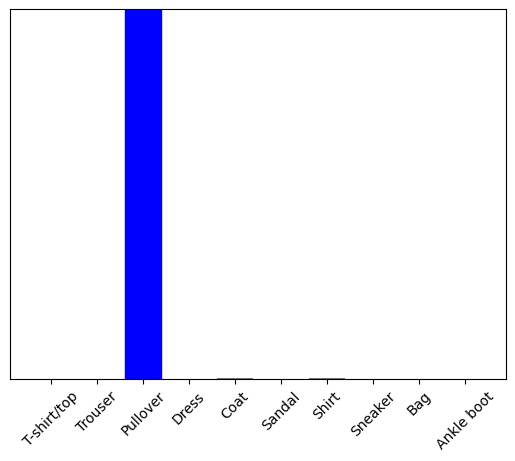

In [54]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [55]:
np.argmax(predictions_single[0])

2

## مودېل مۆلچەردىكىدەك بەلگىنى ئالدىن پەرەز قىلدى.